# Model 5 - Simple fault

I want to create 3-4 simple models in order to show the effect of the distance algorithm for Kriging and how it can be applied to Gempy models. In general I think 3 Layers should be fine, cutting out the central one. Keeping all in the same size around max 5000 grid points gives reasonable calculation times.
1) flat horizontal 
2) anticline 
3) recumbent anticline
4) layer pinching out ?
5) should be something like a fault

In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import pandas as pd

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
geo_data1 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice_offsetC.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice_offsetC.csv")

geo_data2 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice_offsetB.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice_offsetB.csv")

geo_data3 = gp.create_data([0,1000,0,20,0,1000],resolution=[100,2,100], 
                        path_o = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_orientations_slice.csv", 
                        path_i = "C:/Users/Jan/gempy/notebooks/prototype_notebooks/JanThesis/Jan_thesis_model5_interfaces_slice.csv")


In [3]:
gp.set_series(geo_data1, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0) 

gp.set_series(geo_data2, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0)

gp.set_series(geo_data3, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')},
                       order_series = ["Fault_Series", 'Strat_Series'],
                       order_formations=['fault', 
                                         'rock2','rock1'
                                         ], verbose=0)

In [4]:
colormodel = {'basement':'#ffa700','rock1':'#d62d20','rock2':'#0057e7','rock3':'#008744','fault':'#17202a'}
geo_data3.set_colors(colormodel)
geo_data2.set_colors(colormodel)
geo_data3.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data3.formations['color'])[1:])
#geo_data.formations

In [5]:
#%matplotlib inline
#gp.plotting.plot_data(geo_data1, direction='y')

In [6]:
interp_data1 = gp.InterpolatorData(geo_data1, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '9784' (I am process '9356')
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '9356')
INFO (theano.gof.compilelock): To manually release the lock, delete C:\Users\Jan\AppData\Local\Theano\compiledir_Windows-10-10.0.17134-SP0-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-3.6.4-64\lock_dir


Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [7]:
interp_data2 = gp.InterpolatorData(geo_data2, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [8]:
interp_data3 = gp.InterpolatorData(geo_data3, u_grade=[1], output='geology', compile_theano=True, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  1


In [9]:
lith_block1, fault_block1 = gp.compute_model(interp_data1)
lith_block2, fault_block2 = gp.compute_model(interp_data2)
lith_block3, fault_block3 = gp.compute_model(interp_data3)

C:\Users\Jan\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [10]:
import gempy.utils.Kriging_Jan as krige

In [11]:
d = {'X': [200, 200], 'Y': [10, 10], 'Z': [700,700], 'Property': [20, 20]}
data_field = pd.DataFrame(data=d)
print(data_field)

     X   Y    Z  Property
0  200  10  700        20
1  200  10  700        20


In [12]:
np.random.seed(100)
test1 = krige.Kriging(data_field, lith_block1, geo_data1, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block1, an_factor=1, offset=115, var_par=(200,50,1), 
                     fz_ext=(400,440))

np.random.seed(100)
test2 = krige.Kriging(data_field, lith_block2, geo_data2, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block2, an_factor=1, offset=280, var_par=(200,50,1), 
                     fz_ext=(400,510))

np.random.seed(100)
test3 = krige.Kriging(data_field, lith_block3, geo_data3, formation_number=3, kriging_type='OK', 
                     distance_type='deformed_B', faultmodel=fault_block3, an_factor=1, offset=470, var_par=(200,50,1), 
                     fz_ext=(400,600))

initializing: 0.015621185302734375
Fault: True
120.74094127911009
1
distance precalculation: 64.21237802505493
submatrix extraction: 0.015623807907104492
distance Matrices: 0.31247591972351074
kriging calculation: 0.3906252384185791
Negative Variances: 0
Out of: 3817
initializing: 0.01565694808959961
Fault: True
290.02254717951706
1
distance precalculation: 62.38116693496704
submatrix extraction: 0.015612125396728516
distance Matrices: 0.2187178134918213
kriging calculation: 0.4062633514404297
Negative Variances: 0
Out of: 3505
initializing: 0.0
Fault: True
477.3059182605855
1
distance precalculation: 50.11003494262695
submatrix extraction: 0.0312497615814209
distance Matrices: 0.1566317081451416
kriging calculation: 0.3722801208496094
Negative Variances: 0
Out of: 3151


In [13]:
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    X, Y = meshgrid(xi, yi)
    return X, Y, Z

colormodel = {'basement':'#696969','rock1':'#A0A0A0','rock2':'#BEBEBE','rock3':'#008744','fault':'#000000'}
geo_data3.set_colors(colormodel)
geo_data2.set_colors(colormodel)
geo_data1.set_colors(colormodel)
cmap = matplotlib.colors.ListedColormap(list(geo_data3.formations['color'])[1:])

# Model 3: 470m

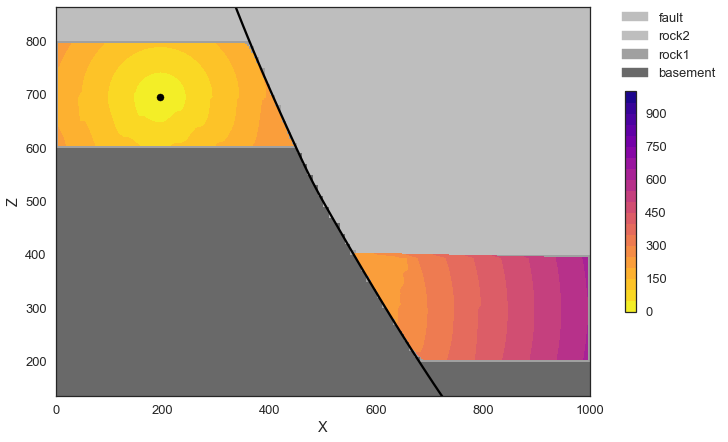

In [18]:
coord_dist = test3.result_coord[:3]
dist_plt = test3.dist_matrix_plt[:,1]
combined = np.vstack((coord_dist, dist_plt, test3.fault_check))
combined = np.swapaxes(combined,0,1)
combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3,4]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,3]==2)
combined_cut_left = combined_cut[combined_cut_left]
combined_cut_right = np.where(combined_cut[:,3]==1)
combined_cut_right = combined_cut[combined_cut_right]

b = plt.scatter(x=coord_dist[0,1], y=coord_dist[2,1], c='black', s=50, marker='o',zorder=3)

X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm=matplotlib.colors.Normalize(vmin=0, vmax=1000)
v = np.linspace(0, 1000,21, endpoint=True)

a = plt.contourf(X1, Y1, Z1, v, cmap='plasma_r', norm=norm)
b = plt.contourf(X2, Y2, Z2, v, cmap='plasma_r', norm=norm)

gp.plotting.plot_section(geo_data3, lith_block3[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data3, interp_data3, cell_number=1,
                         direction='y', fb=fault_block3)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Distance_field_offset465_a=1', edgecolor='black', bbox_inches='tight')

# Model 2: 280m

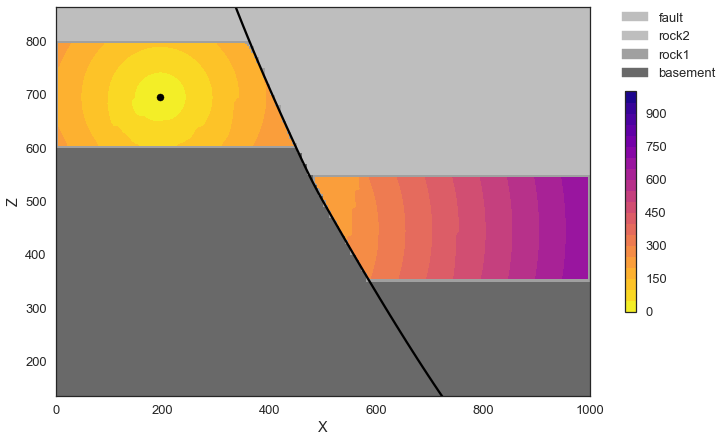

In [19]:
coord_dist = test2.result_coord[:3]
dist_plt = test2.dist_matrix_plt[:,1]
combined = np.vstack((coord_dist, dist_plt, test2.fault_check))
combined = np.swapaxes(combined,0,1)
combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3,4]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,3]==2)
combined_cut_left = combined_cut[combined_cut_left]
combined_cut_right = np.where(combined_cut[:,3]==1)
combined_cut_right = combined_cut[combined_cut_right]

b = plt.scatter(x=coord_dist[0,1], y=coord_dist[2,1], c='black', s=50, marker='o',zorder=3)

X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm=matplotlib.colors.Normalize(vmin=0, vmax=1000)
v = np.linspace(0, 1000,21, endpoint=True)

a = plt.contourf(X1, Y1, Z1, v, cmap='plasma_r', norm=norm)
b = plt.contourf(X2, Y2, Z2, v, cmap='plasma_r', norm=norm)

gp.plotting.plot_section(geo_data2, lith_block2[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data2, interp_data2, cell_number=1,
                         direction='y', fb=fault_block2)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Distance_field_offset280_a=1', edgecolor='black', bbox_inches='tight')

# Model 1: 115m

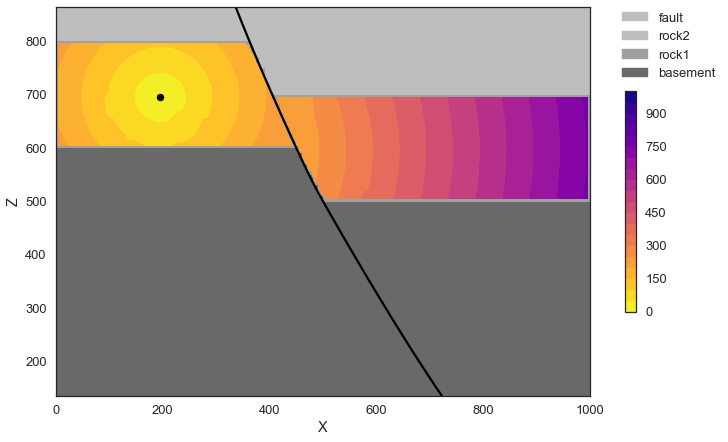

In [20]:
coord_dist = test1.result_coord[:3]
dist_plt = test1.dist_matrix_plt[:,1]
combined = np.vstack((coord_dist, dist_plt, test1.fault_check))
combined = np.swapaxes(combined,0,1)
combined_cut = np.where(combined[:,1]<10)[0]
combined_cut = combined[combined_cut]
combined_cut = combined_cut[:,[0,2,3,4]]

# seperate both fault blocks by position for contourf
combined_cut_left = np.where(combined_cut[:,3]==2)
combined_cut_left = combined_cut[combined_cut_left]
combined_cut_right = np.where(combined_cut[:,3]==1)
combined_cut_right = combined_cut[combined_cut_right]

b = plt.scatter(x=coord_dist[0,1], y=coord_dist[2,1], c='black', s=50, marker='o',zorder=3)

X1, Y1, Z1 = grid(combined_cut_left[:,0], combined_cut_left[:,1], combined_cut_left[:,2])
X2, Y2, Z2 = grid(combined_cut_right[:,0], combined_cut_right[:,1], combined_cut_right[:,2])

norm=matplotlib.colors.Normalize(vmin=0, vmax=1000)
v = np.linspace(0, 1000,21, endpoint=True)

a = plt.contourf(X1, Y1, Z1, v, cmap='plasma_r', norm=norm)
b = plt.contourf(X2, Y2, Z2, v, cmap='plasma_r', norm=norm)

gp.plotting.plot_section(geo_data1, lith_block1[0], cell_number=1,
                         direction='y', plot_data=False, cmap=cmap, norm=None)

gp.plotting.extract_countours(geo_data1, interp_data1, cell_number=1,
                         direction='y', fb=fault_block1)

plt.colorbar(a, orientation='vertical', fraction=0.019, pad=0.06)

plt.axis('equal')
plt.xlim(0,1000)
plt.ylim(200,800)

plt.savefig(fname='Distance_field_offset115_a=1', edgecolor='black', bbox_inches='tight')